In [3]:
# EDA tools 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Model Evaluation 
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,f1_score,recall_score
from sklearn.metrics import RocCurveDisplay

* Load Data

In [4]:
# Load Dataset
df=pd.read_csv("data/heart_disease.csv")
df.head(3)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,60,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,35,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


* Data Exploration

In [8]:
# Check if data is balanced
df["output"].value_counts() 

output
1    165
0    124
Name: count, dtype: int64

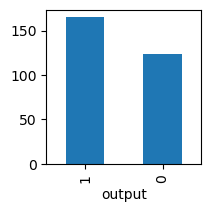

In [18]:
#Visualize the dataset is balanced or not 
df["output"].value_counts().plot(figsize=(2,2),kind='bar');

In [10]:
# Information about dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       289 non-null    int64  
 1   sex       289 non-null    int64  
 2   cp        289 non-null    int64  
 3   trtbps    289 non-null    int64  
 4   chol      289 non-null    int64  
 5   fbs       289 non-null    int64  
 6   restecg   289 non-null    int64  
 7   thalachh  289 non-null    int64  
 8   exng      289 non-null    int64  
 9   oldpeak   289 non-null    float64
 10  slp       289 non-null    int64  
 11  caa       289 non-null    int64  
 12  thall     289 non-null    int64  
 13  output    289 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 31.7 KB


In [12]:
# Additional Information like mean std min max etc 
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000
mean,54.010381,0.678201,1.020761,131.377163,247.961938,0.145329,0.515571,150.231834,0.318339,1.007612,1.418685,0.712803,2.314879,0.570934
std,9.132316,0.467977,1.027192,17.518432,51.596208,0.353043,0.514309,22.899650,0.466640,1.133491,0.613333,1.022596,0.596128,0.495801
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,212.000000,0.000000,0.000000,136.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,54.000000,1.000000,1.000000,130.000000,243.000000,0.000000,1.000000,154.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,276.000000,0.000000,1.000000,168.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


* Try to find patterns by comparing 

In [19]:
df.sex.value_counts()

sex
1    196
0     93
Name: count, dtype: int64

In [21]:
# Compare the Target columns with sex columns 
pd.crosstab(df.output,df.sex)

sex,0,1
output,,
0,21,103
1,72,93


In [33]:
f'{72/(21+72)*100:.2f}% chance that if we predicting on female she will have heart_disease)'

'77.42% chance that if we predicting on female she will have heart_disease)'

In [38]:
f'{93/(103+93)*100:.2f}% chance that if we predicting on male he will have heart disease'

'47.45% chance that if we predicting on male he will have heart disease'

* Lets see things in pretty way so it stays in our mind 

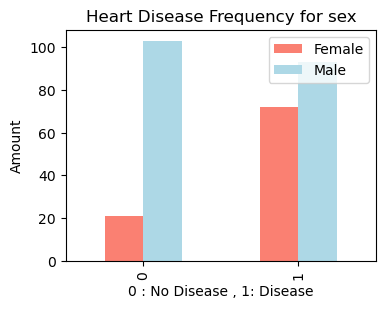

In [46]:
pd.crosstab(df.output,df.sex).plot(kind='bar',figsize=(4,3),color=["salmon","lightblue"])
plt.xlabel("0 : No Disease , 1: Disease")
plt.ylabel("Amount")
plt.title("Heart Disease Frequency for sex")
plt.legend(["Female","Male"])
plt.show()

* Lets find more patterns

In [51]:
df.thalachh.value_counts()

thalachh
162    11
160     9
163     9
152     8
173     8
       ..
190     1
185     1
188     1
137     1
134     1
Name: count, Length: 90, dtype: int64

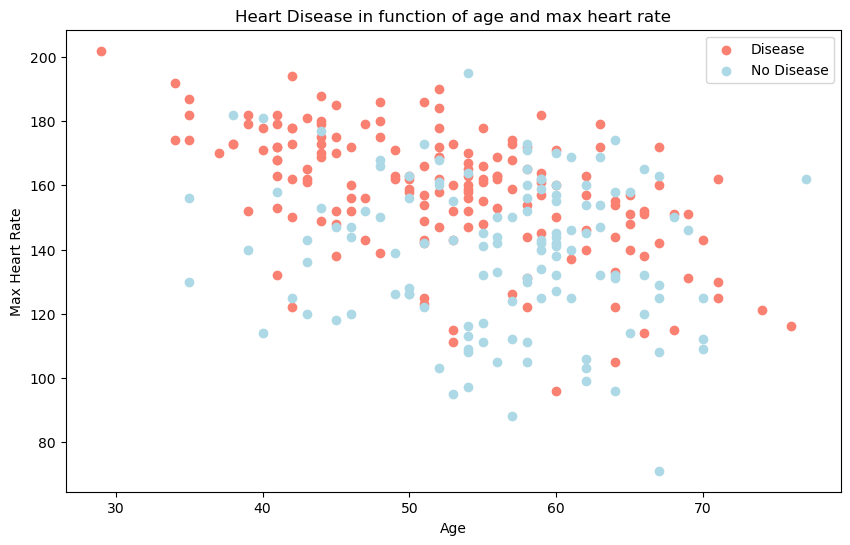

In [55]:

plt.figure(figsize=(10,6))
plt.scatter(df.age[df.output==1],
           df.thalachh[df.output==1],
            c='salmon')
plt.scatter(df.age[df.output==0],
           df.thalachh[df.output==0],
           c="lightblue")
plt.title("Heart Disease in function of age and max heart rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No Disease"])
plt.show()

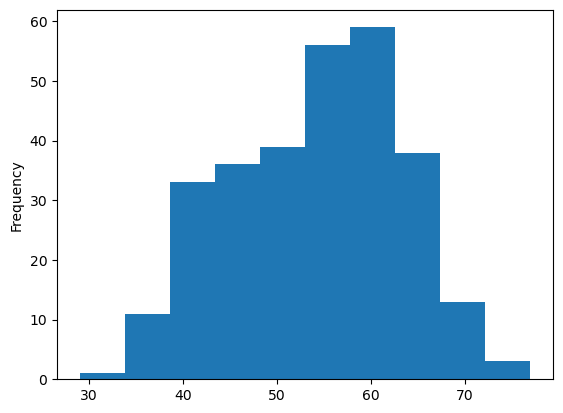

In [57]:
# lets check the distribution of the age column
df.age.plot.hist();

* Chestpain vs output

In [61]:
pd.crosstab(df.cp,df.output)

output,0,1
cp,,
0,87,39
1,13,41
2,17,69
3,7,16


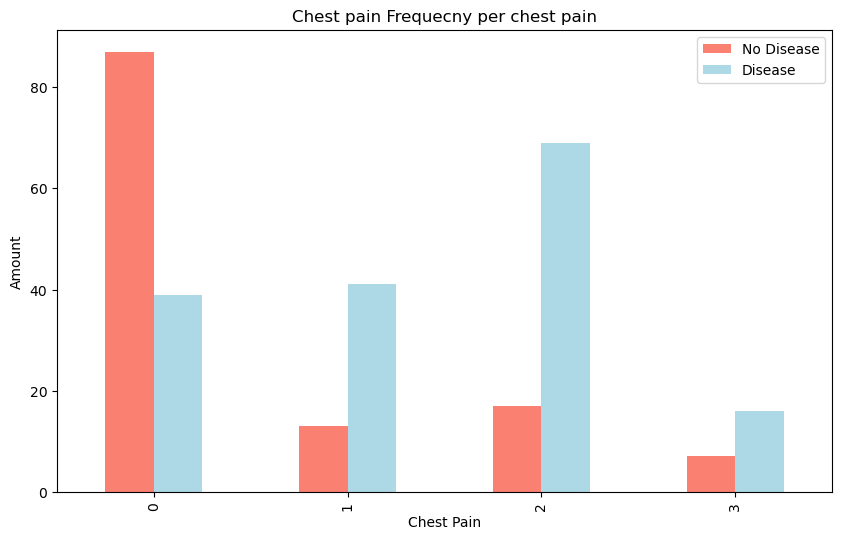

In [66]:
pd.crosstab(df.cp,df.output).plot(
    kind="bar",
    figsize=(10,6),
    color=["salmon","lightblue"]
)
plt.title("Chest pain Frequecny per chest pain")
plt.xlabel("Chest Pain")
plt.ylabel('Amount')
plt.legend(["No Disease","Disease"])
plt.show();

In [ ]:
# Lets Build a correlation matrix 
